In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv(r"C:\Users\차유경\OneDrive\UTD\Career\Projects\ACM\archive\6 class csv.csv")

In [44]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [46]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

## Data Preprocessing

In [48]:
print(list(set(df["Star color"])))

['Red', 'Yellowish', 'Blue white ', 'White-Yellow', 'Blue white', 'Blue White', 'Whitish', 'white', 'yellow-white', 'yellowish', 'Orange-Red', 'Blue-White', 'Yellowish White', 'Blue-white', 'Blue ', 'Blue', 'Orange', 'White', 'Pale yellow orange']


In [68]:
blue = ['Blue white ', 'Blue white', 'Blue White', 'Blue-White', 'Blue-white', 'Blue ', 'Blue']
red = ['Red']
yellow = ['Yellowish', 'White-Yellow', 'yellow-white', 'yellowish', 'Yellowish White']
orange = ['Orange-Red', 'Orange', 'Pale yellow orange']
white = ['Whitish', 'white', 'White']


In [67]:
df[df['Star color'].isin(blue)][['Star color']] = 'blue'
df[df['Star color'].isin(red)][['Star color']] = 'red'
df[df['Star color'].isin(yellow)][['Star color']] = 'yellow'
df[df['Star color'].isin(orange)][['Star color']] = 'orange'
df[df['Star color'].isin(white)][['Star color']] = 'white'

C:\Users\Public\anaconda\lib\site-packages\pandas\core\frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


In [72]:
index_blue = df.index[df['Star color'].isin(blue)].tolist()
df.at[index_blue,'Star color'] = 'blue'
index_red = df.index[df['Star color'].isin(red)].tolist()
df.at[index_red,'Star color'] = 'red'
index_yellow = df.index[df['Star color'].isin(yellow)].tolist()
df.at[index_yellow,'Star color'] = 'yellow'
index_orange = df.index[df['Star color'].isin(orange)].tolist()
df.at[index_orange,'Star color'] = 'orange'
index_white = df.index[df['Star color'].isin(white)].tolist()
df.at[index_white,'Star color'] = 'white'

In [73]:
df['Star color'].unique()

array(['red', 'blue', 'white', 'yellow', 'orange'], dtype=object)

In [74]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,column-name
0,3068,0.002400,0.1700,16.12,0,red,M,red
1,3042,0.000500,0.1542,16.60,0,red,M,red
2,2600,0.000300,0.1020,18.70,0,red,M,red
3,2800,0.000200,0.1600,16.65,0,red,M,red
4,1939,0.000138,0.1030,20.06,0,red,M,red
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,blue,O,NaN
236,30839,834042.000000,1194.0000,-10.63,5,blue,O,NaN
237,8829,537493.000000,1423.0000,-10.73,5,white,A,white
238,9235,404940.000000,1112.0000,-11.23,5,white,A,white


In [93]:
df_red = df[df['Star color'] == 'red']
df_blue = df[df['Star color'] == 'blue']
df_white = df[df['Star color'] == 'white']
df_yellow = df[df['Star color'] == 'yellow']
df_orange = df[df['Star color'] == 'orange']

## Data Visualization

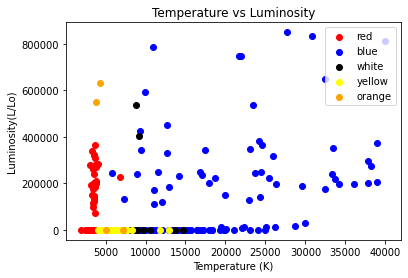

In [96]:
plt.scatter(df_red['Temperature (K)'], df_red['Luminosity(L/Lo)'], c = 'red', label = 'red')
plt.scatter(df_blue['Temperature (K)'], df_blue['Luminosity(L/Lo)'], c = 'blue', label = 'blue')
plt.scatter(df_white['Temperature (K)'], df_white['Luminosity(L/Lo)'], c = 'black', label = 'white')
plt.scatter(df_yellow['Temperature (K)'], df_yellow['Luminosity(L/Lo)'], c = 'yellow', label = 'yellow')
plt.scatter(df_orange['Temperature (K)'], df_orange['Luminosity(L/Lo)'], c = 'orange', label = 'orange')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Temperature vs Luminosity')
plt.legend()

## Linear Regression - Predicting Temperature

In [100]:
df_sub = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

<AxesSubplot: >

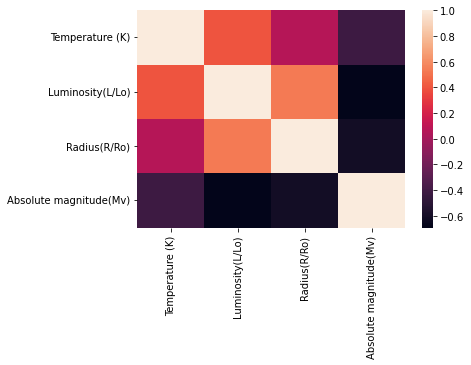

In [106]:
sns.heatmap(df_sub.corr())
# dataplot=sb.heatmap(data.corr())

In [107]:
X = df[['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = df['Temperature (K)']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lm = LinearRegression()

In [112]:
lm.fit(X_train,y_train)

LinearRegression()

In [113]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Luminosity(L/Lo),0.016432
Radius(R/Ro),-7.225983
Absolute magnitude(Mv),-393.255328


In [114]:
predictions = lm.predict(X_test)

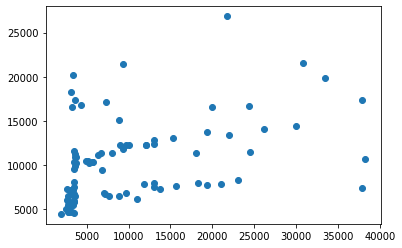

In [115]:
plt.scatter(y_test,predictions)

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5982.368096258952
MSE: 65202592.86399471
RMSE: 8074.81224945786
